In [116]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [117]:
x=np.random.rand(20).reshape(4,5)
y=np.random.randint(0,2,4).reshape(4,1)
x

array([[ 0.21853693,  0.10406395,  0.98705801,  0.41009209,  0.50617691],
       [ 0.84313749,  0.00369721,  0.27653742,  0.54897532,  0.61273228],
       [ 0.84060937,  0.38245069,  0.42028151,  0.23160113,  0.15682363],
       [ 0.06705777,  0.49434372,  0.96417057,  0.91032585,  0.32068294]])

In [118]:
theta=(np.random.randn(25)*0.1).reshape(5,5)
b=np.random.rand(5).reshape(5,1)

# Forward Propogation

In [119]:
#dimensions of each layer
dimensions=np.array([5,4,3,2,1])

#empty array of weights of all layers 
weights=np.zeros(len(dimensions)*(dimensions[0]**2)).reshape(len(dimensions),(dimensions[0]**2))

#empty array of biases of all layers
bias=np.zeros(len(dimensions)*dimensions[0]).reshape(len(dimensions),dimensions[0])

#empty array of Zs of all layers
Z=np.zeros(len(dimensions)*(dimensions[0]**2)).reshape(len(dimensions),(dimensions[0]**2))

#empty array of as of all layers
A=np.zeros(len(dimensions)*(dimensions[0]**2)).reshape(len(dimensions),dimensions[0]**2)

#empty array for shapes of a
shapes=np.zeros(10).reshape(5,2)

#empty array for shapes of thetas
shapes_thetas=np.zeros(10).reshape(5,2)

#empty array for shapes of bias
shapes_bias=np.zeros(10).reshape(5,2)

tic=time.time()
#loop for computation of z, a, theta and bias  of all layers expect input
for i in range (0,len(dimensions)):
    # array of z of each layer
    z=np.zeros(dimensions[i]*len(x)).reshape(dimensions[i],len(x))
    
    
    #print (theta.shape)
    shapes_thetas[i]=theta.shape
    
    shapes_bias[i]=b.shape
    #store all layer thetas in one array
    k=0
    for m in range(0,len(theta)):
        for n in range(0,len(theta[0])):
            weights[i][k]=theta[m][n]
            k+=1
    
    #store all layer biases in one array        
    c=0
    for f in range(0,len(b)):
        bias[i][c]=b[f][0]
        c+=1
    
    #compute z of each layer
    for j in range(0,len(theta)):
        z[j]=np.dot(x,theta[j].T)+b[j]
    z=z.T
    #print (z.shape)
    #store all layers Zs in one array
    temp=0
    for m in range(0,len(z)):
        for n in range(0,len(z[0])):
            Z[i][temp]=z[m][n]
            temp+=1
    
    #compute a 
    a=1/(1+np.exp(-z))
    shapes[i]=a.shape
    if i==(len(dimensions)-1):
        a=-y*np.log(a)+(1-y)*np.log(1-a)
    #store all layers As in one array 
    temp=0
    for m in range(0,len(a)):
        for n in range(0,len(a[0])):
            A[i][temp]=a[m][n]
            temp+=1
    
    #make output of each layer as input of another layer
    x=a
    
    #Go outside the loop 
    if i==(len(dimensions)-1):
        break
        
    #generate new thetas and biases for each layer
    theta=(np.random.randn(dimensions[i+1]*dimensions[i])*0.1).reshape(dimensions[i+1],dimensions[i])
    b=np.random.rand(dimensions[i+1]).reshape(dimensions[i+1],1) 
toc=time.time()
print ((toc-tic)*1000,'nanoseconds')   

1.003265380859375 nanoseconds


# Backword Propogation

In [120]:
da=a-y 
#print(np.mean(da**2))
for i in range (len(dimensions)-1,-1,-1):
    a=np.trim_zeros(A[i])
    a=a.reshape(int(shapes[i][0]),int(shapes[i][1]))
    b=np.trim_zeros(A[i-1])
    b=b.reshape(int(shapes[i-1][0]),int(shapes[i-1][1]))
    z1=np.trim_zeros(Z[i])
    z1=z1.reshape(int(shapes[i][0]),int(shapes[i][1]))
    dz=da*(a*(1-a))
    dw=np.dot(b.T,dz)
    dw=np.mean(dw,axis=0)
    db=np.mean(dz,axis=0)
    w=np.trim_zeros(weights[i])
    w=w.reshape(int(shapes_thetas[i][0]),int(shapes_thetas[i][1]))
    bi=np.trim_zeros(bias[i])
    bi=bi.reshape(int(shapes_bias[i][0]),int(shapes_bias[i][1]))
    for j in range(0,len(w)):
        w[j]=w[j]*(1-(100*0.021)/len(x))-0.021*dw[j]
    for l in range(0,len(bi)):
        bi[l]=bi[l]-0.021*db[l]   
    da=np.dot(dz,w)
print (da)    

[[ -3.35344869e-10  -2.94606557e-10   6.24566828e-10  -2.25869399e-12
    1.14678886e-11]
 [  3.96464771e-09   3.51220894e-09  -7.42326541e-09  -6.91386101e-11
   -1.92033308e-10]
 [  4.01331654e-09   3.54758459e-09  -7.45635735e-09  -4.88056996e-11
   -1.84689491e-10]
 [  3.95243686e-09   3.47674140e-09  -7.37671528e-09   2.92298843e-12
   -1.52997497e-10]]


# 100 more Iterations

In [121]:
Jtheta=np.zeros(650)
tic=time.time()
for q in range(0,len(Jtheta)):
    x=np.random.rand(20).reshape(4,5)
    dimensions=np.array([5,4,3,2,1])
    Z=np.zeros(len(dimensions)*(dimensions[0]**2)).reshape(len(dimensions),(dimensions[0]**2))
    A=np.zeros(len(dimensions)*(dimensions[0]**2)).reshape(len(dimensions),dimensions[0]**2)
    for i in range (0,len(dimensions)):
        # array of z of each layer
        z=np.zeros(dimensions[i]*len(x)).reshape(dimensions[i],len(x))
        theta=np.trim_zeros(weights[i])
        theta=theta.reshape(int(shapes_thetas[i][0]),int(shapes_thetas[i][1]))
        b=np.trim_zeros(bias[i])
        b=b.reshape(int(shapes_bias[i][0]),int(shapes_bias[i][1]))
        #store all layer thetas in one array
        k=0
        for m in range(0,len(theta)):
            for n in range(0,len(theta[0])):
                weights[i][k]=theta[m][n]
                k+=1
    
        #store all layer biases in one array        
        c=0
        for f in range(0,len(b)):
            bias[i][c]=b[f][0]
            c+=1
        #compute z of each layer
        for j in range(0,len(theta)):
            z[j]=np.dot(x,theta[j].T)+b[j]
        z=z.T
        
        #print (z.shape)
        #store all layers Zs in one array
        temp=0
        for m in range(0,len(z)):
            for n in range(0,len(z[0])):
                Z[i][temp]=z[m][n]
                temp+=1
    
        #compute a 
        a=1/(1+np.exp(-z))
        shapes[i]=a.shape
        if i==(len(dimensions)-1):
            a=-y*np.log(a)+(1-y)*np.log(1-a)
        #store all layers As in one array 
        temp=0
        for m in range(0,len(a)):
            for n in range(0,len(a[0])):
                A[i][temp]=a[m][n]
                temp+=1
    
        #make output of each layer as input of another layer
        x=a
    
        #Go outside the loop 
        if i==(len(dimensions)-1):
            break   
    da=a-y 
    #print (np.mean(da**2))
    Jtheta[q]=np.mean(da**2)
    for i in range (len(dimensions)-1,-1,-1):
        a=np.trim_zeros(A[i])
        a=a.reshape(int(shapes[i][0]),int(shapes[i][1]))
        b=np.trim_zeros(A[i-1])
        b=b.reshape(int(shapes[i-1][0]),int(shapes[i-1][1]))
        z1=np.trim_zeros(Z[i])
        z1=z1.reshape(int(shapes[i][0]),int(shapes[i][1]))
        dz=da*(a*(1-a))
        dw=np.dot(b.T,dz)
        dw=np.mean(dw,axis=0)
        db=np.mean(dz,axis=0)
        w=np.trim_zeros(weights[i])
        w=w.reshape(int(shapes_thetas[i][0]),int(shapes_thetas[i][1]))
        bi=np.trim_zeros(bias[i])
        bi=bi.reshape(int(shapes_bias[i][0]),int(shapes_bias[i][1]))
        for j in range(0,len(w)):
            w[j]=w[j]*(1-(10*0.021)/len(x))-0.021*dw[j]
        for l in range(0,len(bi)):
            bi[l]=bi[l]-0.021*db[l]   
        da=np.dot(dz,w) 
toc=time.time()
print((toc-tic)*1000,'nanoseconds')

1287.1623039245605 nanoseconds


In [124]:
Jtheta=Jtheta*100

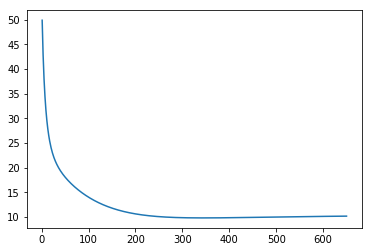

In [123]:
iterations=np.arange(1,len(Jtheta)+1)
plt.plot(iterations,Jtheta)
plt.show()